In [3]:
import pandas as pd #handling structured data
import numpy as np #numerical computing
import seaborn as sns #statistical data visualization
import matplotlib.pyplot as plt #interactive visualization
%matplotlib inline
#used in Jupyter Notebooks to display Matplotlib plots inline (i.e., directly within the notebook) instead of opening them in a separate window.
import warnings
warnings.filterwarnings('ignore')  #Suppresses all warnings that would otherwise appear during runtime.

In [4]:
#read the dataset
df=pd.read_csv('stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape  #rows and  columns

(1000, 8)

## Data Checks to perform
- Check missing values
- Check duplicates
- Check data types
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in different categorical columns

In [6]:
# check missing values
df.isnull().sum() # used to identify missing (null) values in a DataFrame and count the total number of nulls in each column.

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
#there are no missing values

In [8]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [9]:
# check duplicates

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [12]:
#no duplicate values

In [13]:
# check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [14]:
# checking the number of unique values of each column

In [15]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [16]:
# check the statistics of the dataset
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [17]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [18]:
#segregate numerical and categorical features
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']  #O for object datatype

In [19]:
numerical_features

['math_score', 'reading_score', 'writing_score']

In [20]:
categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [21]:
#aggregate the total score with mean

In [22]:
df['total_score']=(df['math_score']+df['reading_score']+df['writing_score'])
df['average']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


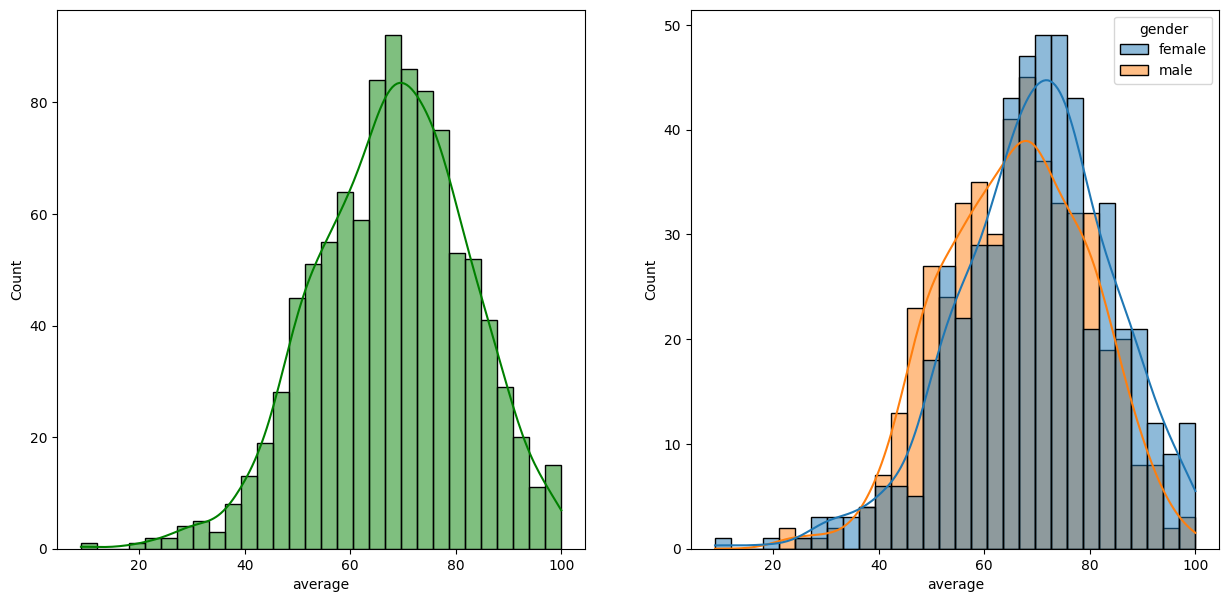

In [23]:
#explore more visualization
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df,x='average', bins=30, kde=True, hue='gender')
plt.show()

In [24]:
# female students performed better than male

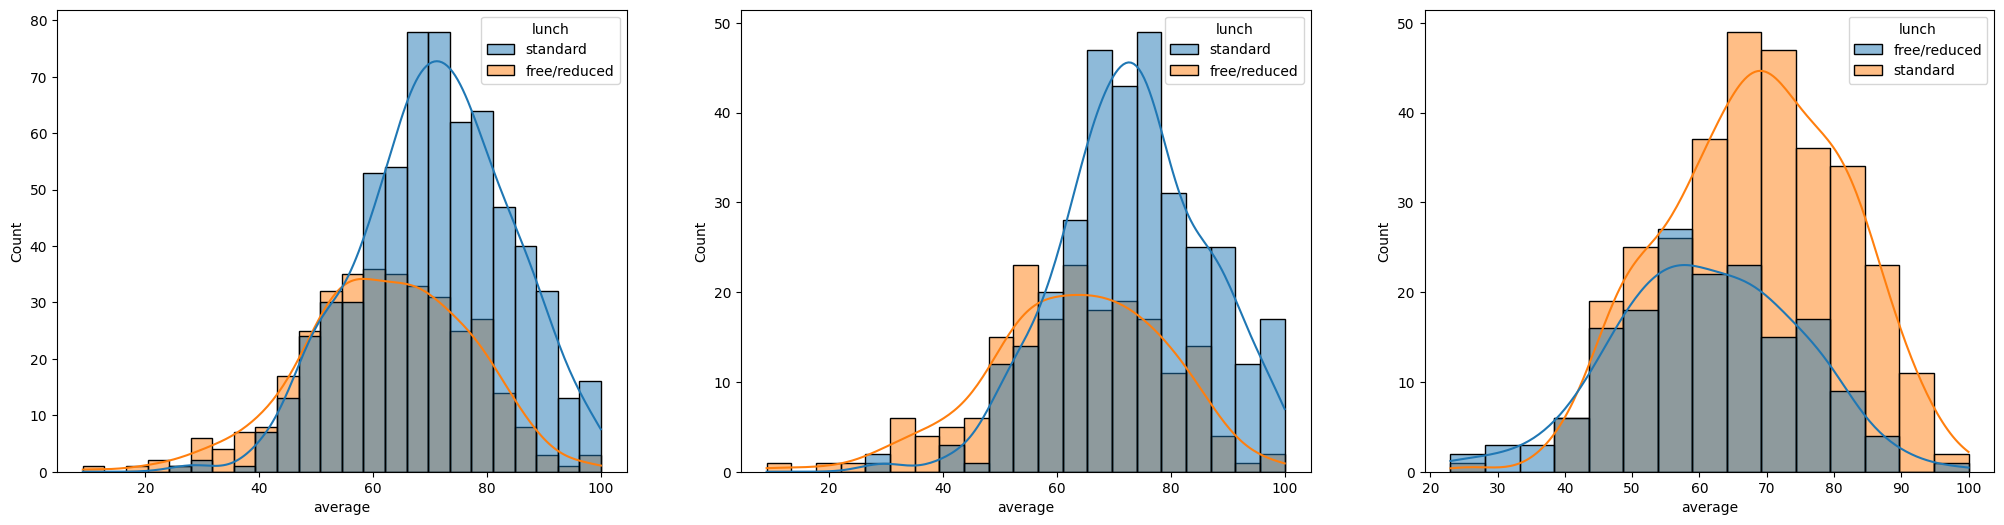

In [26]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average', kde='True', hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', kde='True', hue='lunch')
plt.show()

In [29]:
#standard lunch helps students  perform wellin exam
#standard lunch helps perform well in exams be it a male or female

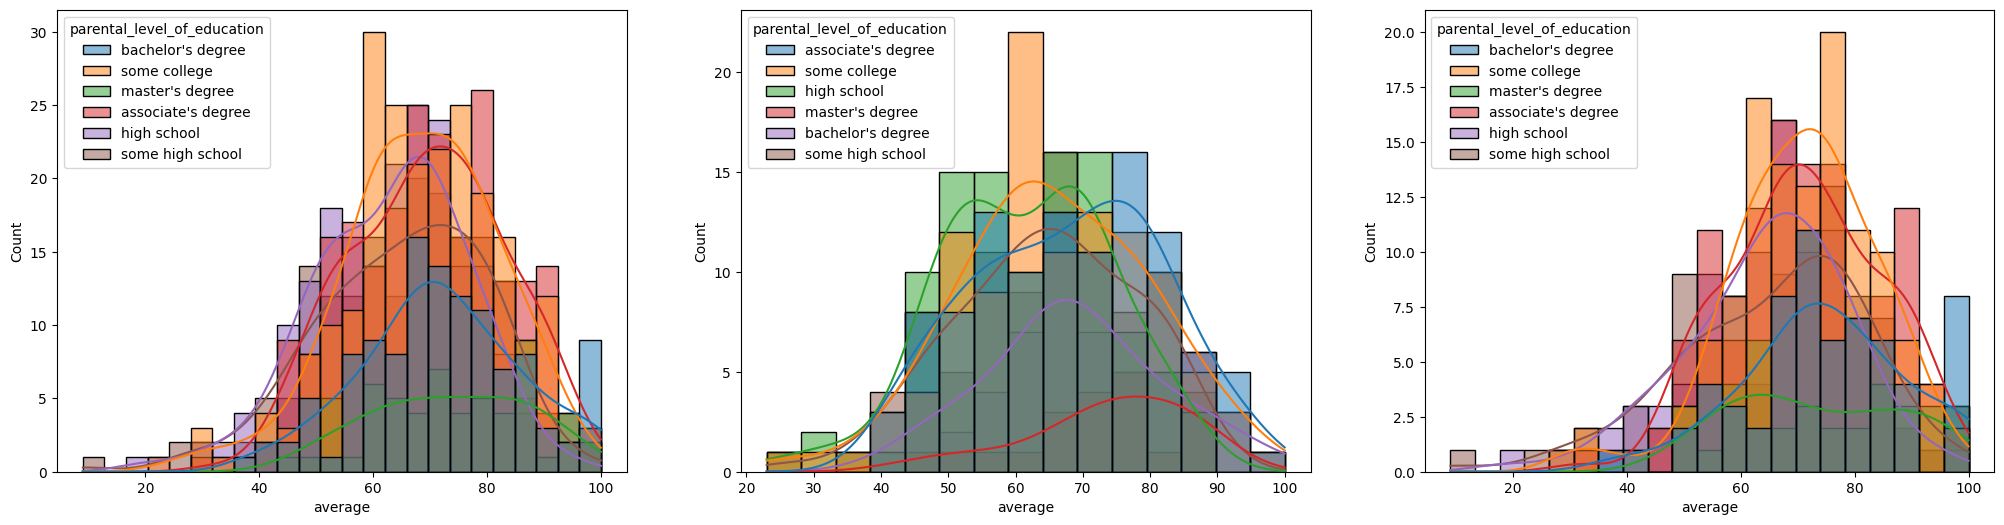

In [31]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'], x='average', kde='True', hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'], x='average', kde='True', hue='parental_level_of_education')
plt.show()

In [32]:
# in general parent's education don't help student perform well in exam
# 2nd plot shows that parents whose education is of  associate's degree or masters degree, their male child tend to perform well in exam
# 3rd plot shows that there is no effect of parent's edcuation on female students

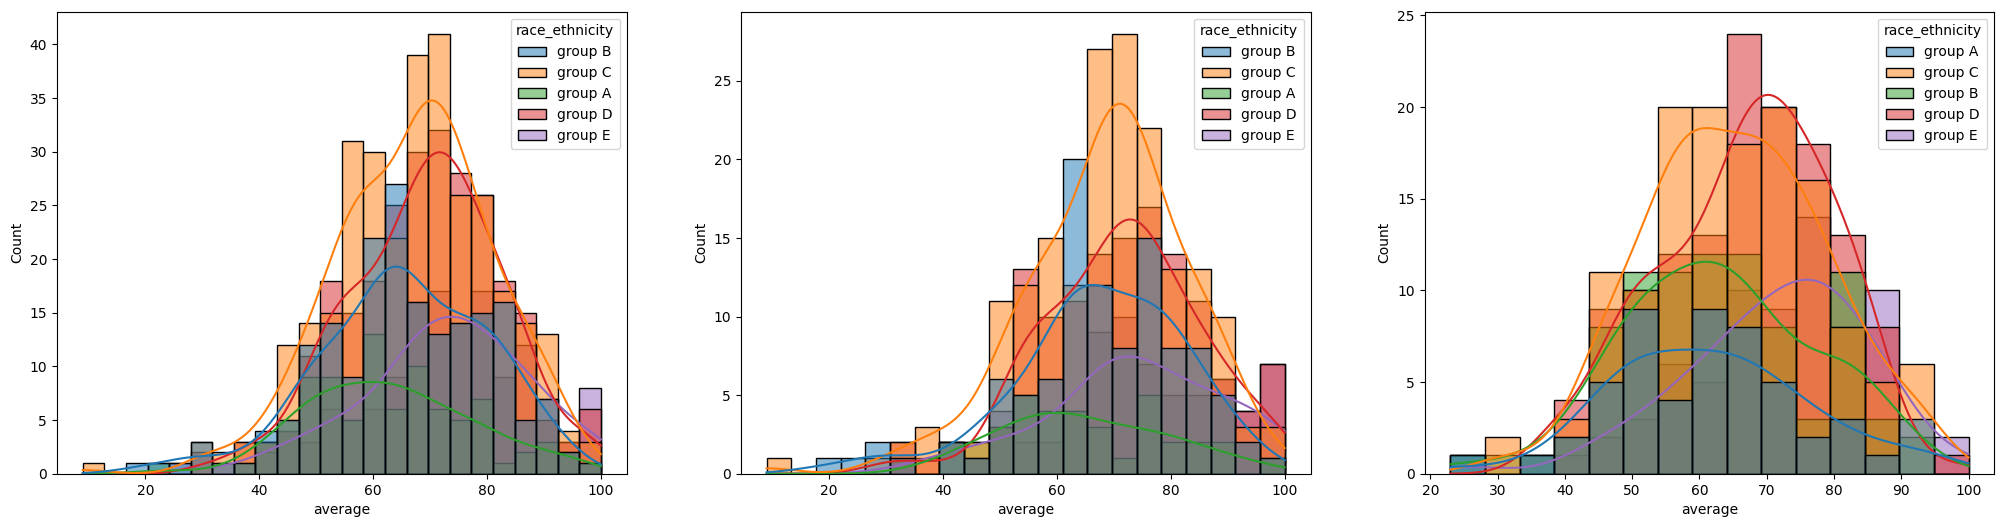

In [33]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average', kde='True', hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', kde='True', hue='race_ethnicity')
plt.show()

In [34]:
# students of group A and B perform poorly in exams
# students of group A and B perform poorly in exams irrespective of their gender

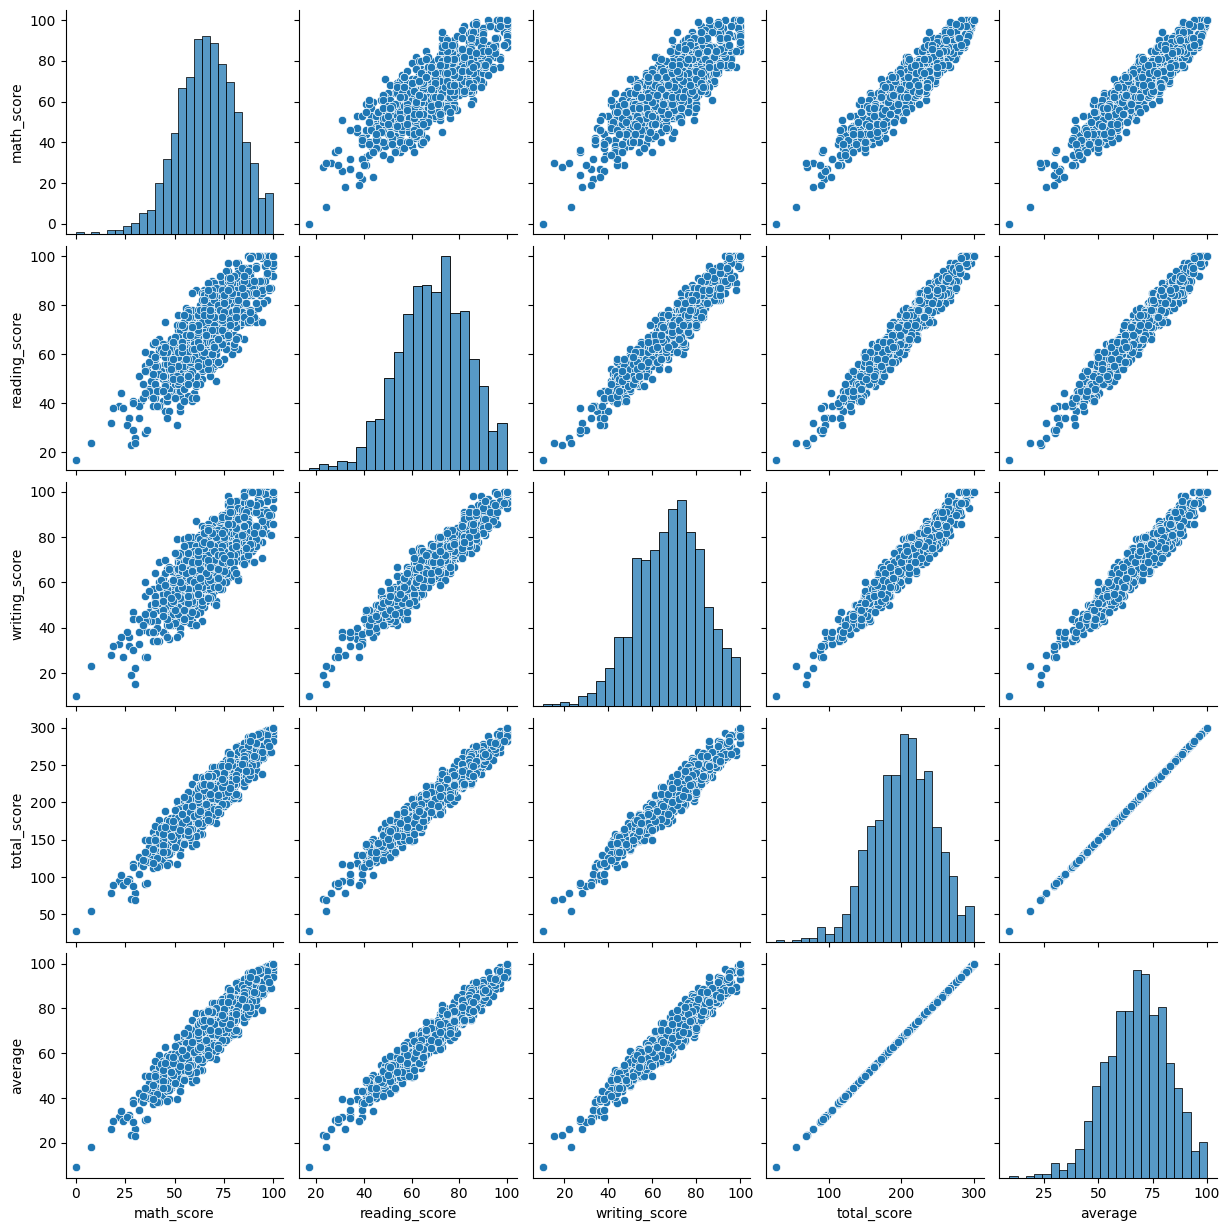

In [35]:
sns.pairplot(df)

In [39]:
sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: 'female'